In [33]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [34]:
# Load .env enviroment variables
load_dotenv()

True

In [35]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets",
    api_version="v2")

In [36]:
# Format current date as ISO format
start_date1 = pd.Timestamp("2015-04-01", tz="America/New_York").isoformat()
end_date1 = pd.Timestamp("2018-03-31", tz="America/New_York").isoformat()

start_date2 = pd.Timestamp("2018-04-01", tz="America/New_York").isoformat()
end_date2 = pd.Timestamp("2021-03-31", tz="America/New_York").isoformat()

### We look at 3 Agricultural Commodity ETFs: Wheat, Corn and Soybean. 

### We also look at WTI (West Texas Initative), a Crude Oil Futures Contract.


In [63]:
# Set the tickers
tickers = ["WEAT", "CORN", "SOYB", "WTI"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get 6 years worth of historical data for WEAT, CORN and SOYB

# Max limit of 1000 so we get two sets of date range data and concatenate.
df_etf_data1 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date1,
    end = end_date1,
    limit=1000
).df

df_etf_data2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date2,
    end = end_date2,
    limit=1000
).df



# Display sample data
##df_fund_data.head()

In [64]:
#Concatenate
df_etf_data = df_etf_data1.append(df_etf_data2)

In [65]:
df_etf_data

CORN                                      SOYB  \
                            open     high      low   close   volume   open   
time                                                                         
2015-04-01 00:00:00-04:00  24.75  25.1400  24.6200  25.050    45118  19.63   
2015-04-02 00:00:00-04:00  24.94  25.4900  24.9200  25.370    48518  19.87   
2015-04-06 00:00:00-04:00  25.37  25.3700  25.1901  25.250    36986  20.00   
2015-04-07 00:00:00-04:00  25.22  25.2200  25.0703  25.140    11214  19.73   
2015-04-08 00:00:00-04:00  25.17  25.1700  24.7700  24.890    28290  19.70   
...                          ...      ...      ...     ...      ...    ...   
2021-03-25 00:00:00-04:00  16.81  16.8600  16.7000  16.785   208163  21.09   
2021-03-26 00:00:00-04:00  16.78  16.8800  16.7800  16.845   171012  20.93   
2021-03-29 00:00:00-04:00  16.76  16.7600  16.6249  16.670   185499  20.82   
2021-03-30 00:00:00-04:00  16.63  16.6366  16.2900  16.380   369156  20.72   
2021-03-31 00:00:00-04:00  16.40  17.7200  16.3400  17.570  1116252  20.54   

                                                                WEAT           \
                              high      low    close  volume    open     high   
time                                                                            
2015-04-01 00:00:00-04:00  19.9700  19.6300  19.9200    6899  10.930  11.2400   
2015-04-02 00:00:00-04:00  20.0400  19.8500  19.9900    5378  11.200  11.5001   
2015-04-06 00:00:00-04:00  20.0000  19.8105  19.8300    1645  11.500  11.5000   
2015-04-07 00:00:00-04:00  19.7499  19.6700  19.7062     801  11.100  11.2700   
2015-04-08 00:00:00-04:00  19.7300  19.6206  19.6400    4420  11.009  11.0900   
...                            ...      ...      ...     ...     ...      ...   
2021-03-25 00:00:00-04:00  21.0900  20.8900  21.0077  113494   5.950   5.9500   
2021-03-26 00:00:00-04:00  21.0100  20.8400  20.8700  116507   5.890   5.9700   
2021-03-29 00:00:00-04:00  20.9000  20.7301  20.7500   43918   5.910   5.9500   
2021-03-30 00:00:00-04:00  20.7300  20.4401  20.4550  128551   5.920   5.9200   
2021-03-31 00:00:00-04:00  21.8800  20.5400  21.6600  308194   5.820   6.0900   

                                                      WTI                      \
                               low    close  volume  open   high   low  close   
time                                                                            
2015-04-01 00:00:00-04:00  10.8000  11.2200   67750  5.13  5.310  5.12  5.210   
2015-04-02 00:00:00-04:00  11.1400  11.3400   58920  5.17  5.360  5.11  5.350   
2015-04-06 00:00:00-04:00  11.1403  11.1832   36607  5.42  5.900  5.38  5.900   
2015-04-07 00:00:00-04:00  11.0000  11.1640   22078  5.81  6.450  5.79  6.030   
2015-04-08 00:00:00-04:00  10.9900  11.0500   26388  6.03  6.170  5.70  5.730   
...                            ...      ...     ...   ...    ...   ...    ...   
2021-03-25 00:00:00-04:00   5.8700   5.8900  375574  3.58  3.650  3.41  3.620   
2021-03-26 00:00:00-04:00   5.8900   5.9350  155488  3.75  3.860  3.68  3.810   
2021-03-29 00:00:00-04:00   5.8501   5.9500  282592  3.74  3.795  3.57  3.635   
2021-03-30 00:00:00-04:00   5.8100   5.8200  308893  3.57  3.670  3.46  3.640   
2021-03-31 00:00:00-04:00   5.7600   6.0100  678941  3.60  3.660  3.54  3.590   

                                      
                              volume  
time                                  
2015-04-01 00:00:00-04:00  2171464.0  
2015-04-02 00:00:00-04:00  2321667.0  
2015-04-06 00:00:00-04:00  2687742.0  
2015-04-07 00:00:00-04:00  4756241.0  
2015-04-08 00:00:00-04:00  3504339.0  
...                              ...  
2021-03-25 00:00:00-04:00  2487398.0  
2021-03-26 00:00:00-04:00  3274084.0  
2021-03-29 00:00:00-04:00  2806942.0  
2021-03-30 00:00:00-04:00  2057965.0  
2021-03-31 00:00:00-04:00  1817676.0  

[1511 rows x 20 columns]

In [66]:
## Clean up 

# Count nulls
df_etf_data.isnull().sum()

CORN  open      0
      high      0
      low       0
      close     0
      volume    0
SOYB  open      0
      high      0
      low       0
      close     0
      volume    0
WEAT  open      0
      high      0
      low       0
      close     0
      volume    0
WTI   open      2
      high      2
      low       2
      close     2
      volume    2
dtype: int64

In [67]:
# Drop nulls
df_etf_data.dropna(inplace=True)
df_etf_data.isnull().sum()

CORN  open      0
      high      0
      low       0
      close     0
      volume    0
SOYB  open      0
      high      0
      low       0
      close     0
      volume    0
WEAT  open      0
      high      0
      low       0
      close     0
      volume    0
WTI   open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [88]:
##Convert to date value (gets rid of closing time date e.g. 16:00) but this operation tends to convert the date type to object type
df_etf_data.index = df_etf_data.index.date

##Convert the Date column back to datetime type
df_etf_data.index = pd.to_datetime(df_etf_data.index, infer_datetime_format=True)

##Sort by index (Date)
df_etf_data = df_etf_data.sort_index()


##nvd_df.head()
df_etf_closing_prices = pd.DataFrame()
df_crude_closing_prices = pd.DataFrame()

##Rename the headers to the corresponding ticker
df_etf_closing_prices["CORN"] = df_etf_data['CORN']['close']
df_etf_closing_prices["WEAT"] = df_etf_data['WEAT']['close']
df_etf_closing_prices["SOYB"] = df_etf_data['SOYB']['close']

df_crude_closing_prices["WTI"] = df_etf_data['WTI']['close']

# Preview DataFrame
df_etf_closing_prices.head()

,CORN,WEAT,SOYB
2015-04-01,25.05,11.2200,19.9200
2015-04-02,25.37,11.3400,19.9900
2015-04-06,25.25,11.1832,19.8300
2015-04-07,25.14,11.1640,19.7062
2015-04-08,24.89,11.0500,19.6400


In [91]:
# Calculate daily returns
etf_daily_returns = df_etf_closing_prices.pct_change()
crude_daily_returns = df_crude_closing_prices.pct_change()

# Drop NAs
etf_daily_returns.dropna(inplace=True)
crude_daily_returns.dropna(inplace=True)

# Display sample data
etf_daily_returns.head()

,CORN,WEAT,SOYB
2015-04-02,0.012774,0.010695,0.003514
2015-04-06,-0.004730,-0.013827,-0.008004
2015-04-07,-0.004356,-0.001717,-0.006243
2015-04-08,-0.009944,-0.010211,-0.003359
2015-04-09,-0.002009,-0.003620,-0.015275




# Performance Analysis

### Daily Returns

<AxesSubplot:>

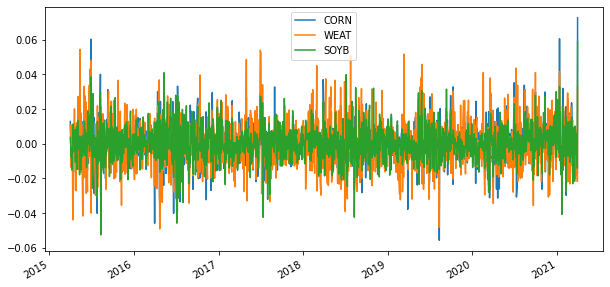

In [92]:
# Plot daily returns of all agricultural commodity etfs
etf_daily_returns.plot(figsize=(10,5))

<AxesSubplot:>

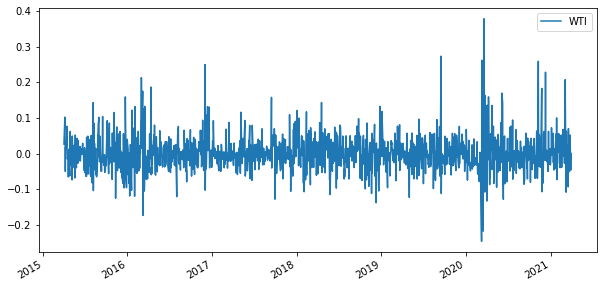

In [93]:
# Daily returns of wti crude oil future
crude_daily_returns.plot(figsize=(10,5))

### Cumulative Returns

<AxesSubplot:>

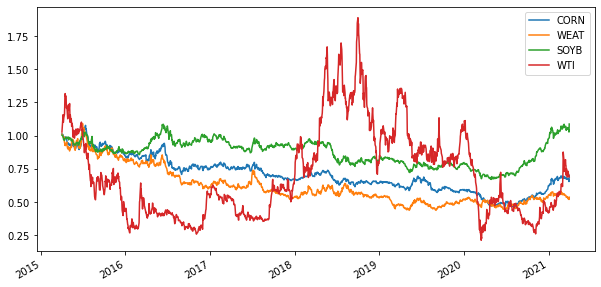

In [98]:
#Combine Agricultural commodities and Crude Oil
commodities_combined = pd.concat(
    [etf_daily_returns, crude_daily_returns], axis="columns", join="inner"
)

# Calculate cumulative returns of all commodities
cumulative_returns = (1+commodities_combined).cumprod()

# Plot cumulative returns for the commodities
cumulative_returns.plot(figsize=(10,5))